In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import statsmodels.api as sm
pd.options.plotting.backend = "plotly"

In [3]:
sales = pd.read_pickle('../Data/sales_day.pkl')
sales.head()

,date,total_amount
0,2009-12-01,37366.32
1,2009-12-02,45644.67
2,2009-12-03,66327.53
3,2009-12-04,31448.44
4,2009-12-05,9042.36


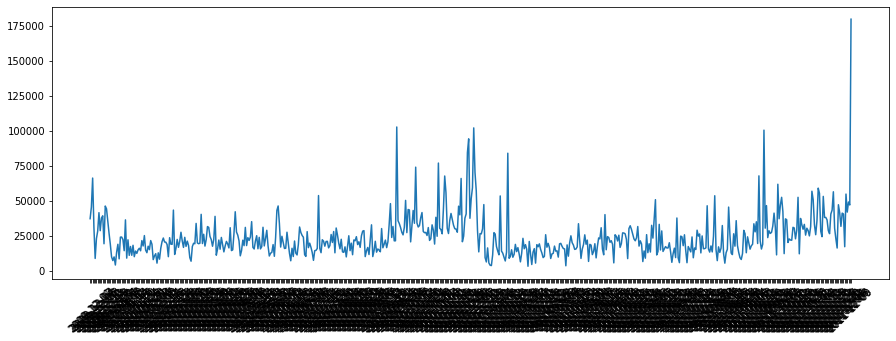

In [4]:
plt.figure(figsize=(15,5))
plt.plot(sales['date'], sales['total_amount'])
plt.xticks(rotation=45)
plt.show()

In [5]:
fig = px.line(sales, x="date", 
                     y="total_amount", 
                     title='Total Sales Amount',
                     labels = {"total_amount": "Total Sales Amount($)",
                                "date": "Date"})
fig.show()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

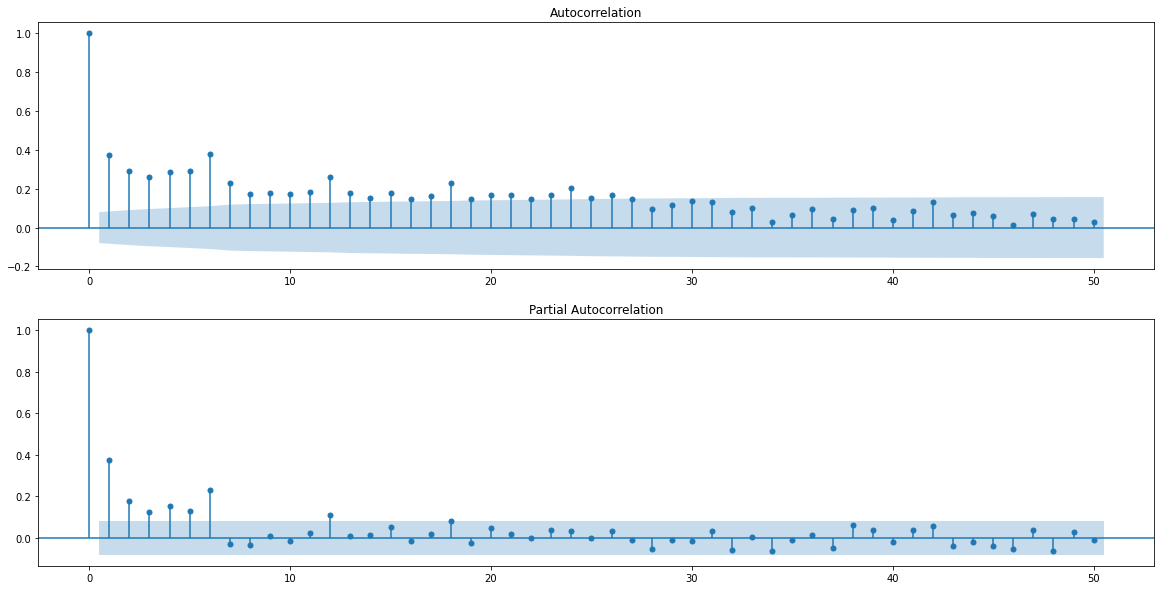

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
plot_acf(sales['total_amount'], lags=50, ax = ax[0])
plot_pacf(sales['total_amount'], lags=50, ax = ax[1])
plt.show()

In [35]:
sales1_train = sales.iloc[:int(sales.shape[0]*0.8)]
sales1_test = sales.iloc[int(sales.shape[0]*0.8):]
print('train: ', sales1_train.shape)
print('test: ', sales1_test.shape)

train:  (483, 2)
test:  (121, 2)


In [36]:
sales1_train['date'] = pd.to_datetime(sales1_train['date'])
sales1_train.index = sales1_train['date']
sales1_train = sales1_train.drop(columns = ['date'])

sales1_test['date'] = pd.to_datetime(sales1_test['date'])
sales1_test.index = sales1_test['date']

sales1_test = sales1_test.drop(columns = ['date'])

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_63253/2897933732.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_63253/2897933732.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
model = sm.tsa.SARIMAX(sales1_train['total_amount'], order=(1,1,1))
results = model.fit()
results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07656D+01    |proj g|=  9.61132D-02

At iterate    5    f=  1.07469D+01    |proj g|=  9.53488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   6.662D-06   1.075D+01
  F =   10.746780200859495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_amount   No. Observations:                  483
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5190.695
Date:                Sat, 25 Feb 2023   AIC                          10387.390
Time:                        16:41:37   BIC                          10399.924
Sample:                             0   HQIC                         10392.316
                                - 483                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2008      0.038      5.256      0.000       0.126       0.276
ma.L1         -0.8822      0.020    -44.839      0.000      -0.921      -0.844
sigma2       1.43e+08    1.7e-11   8.43e+18      0.000    1.43e+08    1.43e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1908.44
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             1.81
Prob(H) (two-sided):                  0.10   Kurtosis:                        12.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.74e+34. Standard errors may be unstable.
"""

In [11]:
import itertools as it

p_min = 0
d_min = 0
q_min = 0

p_max = 10
d_max = 3
q_max = 5

col = ['AR', 'MA', "Diff", 'AIC', 'BIC']
result_frame = pd.DataFrame(columns = col)

for p, d, q in it.product(range(p_min, p_max+1), range(d_min, d_max+1), range(q_min, q_max+1)):
    if p==0 and d==0 and q==0:
        result_frame = result_frame.append(pd.Series([0,0,0,np.nan,np.nan], index = col), ignore_index=True)
        continue
    try:
        model = sm.tsa.SARIMAX(sales1_train['total_amount'], order=(p,d,q))
        results = model.fit()
        result_frame = result_frame.append(pd.Series([p,d,q,results.aic,results.bic], index = col), ignore_index=True)
        
    except:
        continue

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13699D+01    |proj g|=  1.48026D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   1.686D-05   1.135D+01
  F =   11.349823441167773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




At iterate    5    f=  1.07452D+01    |proj g|=  2.42976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   8.838D-06   1.075D+01
  F =   10.745151886886498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07500D+01    |proj g|=  9.02325D-02

At iterate    5    f=  1.07451D+01    |proj g|=  4.95548D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   30    f=  1.07513D+01    |proj g|=  7.00314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   7.003D-05   1.075D+01
  F =   10.751292006168876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08692D+01    |proj g|=  1.81537D-01

At iterate    5    f=  1.07948D+01    |proj g|=  1.36921D-02

At iterate   10    f=  1.07673D+01    |proj g|=  2.17216D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815

At iterate   10    f=  1.10507D+01    |proj g|=  2.80842D-05

At iterate   15    f=  1.10504D+01    |proj g|=  3.24540D-05

At iterate   20    f=  1.09331D+01    |proj g|=  1.74387D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     32      1     0     0   7.996D-06   1.092D+01
  F =   10.920330588291852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32214D+01    |proj g|=  3.65049D+00

At itera

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.10040D+01    |proj g|=  1.39832D-01

At iterate   10    f=  1.08844D+01    |proj g|=  1.07331D-01

At iterate   15    f=  1.08342D+01    |proj g|=  6.67934D-03

At iterate   20    f=  1.08295D+01    |proj g|=  4.15959D-03

At iterate   25    f=  1.08261D+01    |proj g|=  1.12810D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     39      1     0     0   2.770D-03   1.083D+01
  F =   10.826001803006932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   20    f=  1.08483D+01    |proj g|=  3.11276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     42      1     0     0   4.832D-03   1.085D+01
  F =   10.847382551662079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09290D+01    |proj g|=  9.40343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykerne


At iterate   20    f=  1.07669D+01    |proj g|=  4.37747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   3.639D-06   1.077D+01
  F =   10.766879728313862     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07696D+01    |proj g|=  3.31833D-02

At iterate    5    f=  1.07676D+01    |proj g|=  3.99678D-03

At iterate   10    f=  1.07647D+01    |proj g|=  3.58638D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07452D+01    |proj g|=  2.98465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   8.766D-05   1.075D+01
  F =   10.745139191774996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07496D+01    |proj g|=  8.32956D-02

At iterate    5    f=  1.07450D+01    |proj g|=  4.16332D-03

At iterate   10    f=  1.07449D+01    |proj g|=  3.87601D-03

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   2.038D-06   1.074D+01
  F =   10.738120683008988     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11936D+01    |proj g|=  4.77001D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815


At iterate    0    f=  1.13501D+01    |proj g|=  6.45246D-01

At iterate    5    f=  1.09218D+01    |proj g|=  1.92326D-02

At iterate   10    f=  1.07653D+01    |proj g|=  7.38078D-03

At iterate   15    f=  1.07553D+01    |proj g|=  5.09729D-03

At iterate   20    f=  1.07527D+01    |proj g|=  1.21821D-04

At iterate   25    f=  1.07526D+01    |proj g|=  1.54934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     33      1     0     0   3.555D-05   1.075D+01
  F =   10.752600869427503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.08384D+01    |proj g|=  1.02150D-01

At iterate   10    f=  1.07558D+01    |proj g|=  1.52852D-02

At iterate   15    f=  1.07508D+01    |proj g|=  3.69841D-03

At iterate   20    f=  1.07505D+01    |proj g|=  3.02958D-05

At iterate   25    f=  1.07505D+01    |proj g|=  2.48990D-04

At iterate   30    f=  1.07505D+01    |proj g|=  5.87806D-04

At iterate   35    f=  1.07504D+01    |proj g|=  2.69874D-03

At iterate   40    f=  1.07504D+01    |proj g|=  1.60340D-04

At iterate   45    f=  1.07498D+01    |proj g|=  1.08613D-02

At iterate   50    f=  1.07401D+01    |proj g|=  2.82593D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07910D+01    |proj g|=  3.74569D-02

At iterate   10    f=  1.07639D+01    |proj g|=  1.67088D-02

At iterate   15    f=  1.07544D+01    |proj g|=  7.78217D-03

At iterate   20    f=  1.07535D+01    |proj g|=  2.08258D-03

At iterate   25    f=  1.07533D+01    |proj g|=  1.43833D-03

At iterate   30    f=  1.07531D+01    |proj g|=  7.45372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     41      1     0     0   7.235D-05   1.075D+01
  F =   10.753144105231017     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.12055D+01    |proj g|=  1.42979D-03

At iterate   15    f=  1.12054D+01    |proj g|=  1.34998D-05

At iterate   20    f=  1.11771D+01    |proj g|=  3.17180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     30      1     0     0   5.620D-06   1.118D+01
  F =   11.177095909351724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20158D+01    |proj g|=  1.45036D+00

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


At iterate    5    f=  1.10466D+01    |proj g|=  4.54086D-02

At iterate   10    f=  1.09732D+01    |proj g|=  2.21404D-03

At iterate   15    f=  1.08927D+01    |proj g|=  5.51531D-03

At iterate   20    f=  1.08834D+01    |proj g|=  9.97707D-03

At iterate   25    f=  1.08832D+01    |proj g|=  3.16904D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     67      2     0     0   2.698D-04   1.088D+01
  F =   10.883149499969930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25207D+01    |proj g|=  2.28564D+00

At iterate    5    f=  1.10221D+01    |proj g|=  1.69120D-01

At iterate   10    f=  1.08505D+01    |proj g|=  4.60748D-02

At iterate   15    f=  1.08197D+01    |proj g|=  6.42002D-03

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   30    f=  1.08274D+01    |proj g|=  5.43499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     46      1     0     0   3.445D-05   1.083D+01
  F =   10.827384923615710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08633D+01    |proj g|=  1.80055D-03

At iterate    5    f=  1.08633D+01    |proj g|=  1.67333D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07725D+01    |proj g|=  2.70482D-02

At iterate   10    f=  1.07672D+01    |proj g|=  2.43916D-03

At iterate   15    f=  1.07671D+01    |proj g|=  9.94604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   1.981D-05   1.077D+01
  F =   10.767145858865588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07856D+01    |proj g|=  1.30530D-01

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07611D+01    |proj g|=  3.92162D-03

At iterate   25    f=  1.07607D+01    |proj g|=  6.97821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     34      1     0     0   3.730D-05   1.076D+01
  F =   10.760737892988505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08218D+01    |proj g|=  1.60909D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  1.07258D+01    |proj g|=  3.28982D-02

At iterate   20    f=  1.07238D+01    |proj g|=  2.34681D-02

At iterate   25    f=  1.07236D+01    |proj g|=  1.55896D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     36      1     0     0   9.394D-06   1.072D+01
  F =   10.723603247953806     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07397D+01    |proj g|=  1.55065D-01

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07264D+01    |proj g|=  4.80892D-02

At iterate   10    f=  1.07247D+01    |proj g|=  1.05669D-02

At iterate   15    f=  1.07244D+01    |proj g|=  3.20666D-03

At iterate   20    f=  1.07239D+01    |proj g|=  8.53659D-03

At iterate   25    f=  1.07238D+01    |proj g|=  1.83649D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     36      1     0     0   1.377D-04   1.072D+01
  F =   10.723747590749298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09727D+01    |proj g|=  1.64437D-01

At iterate    5    f=  1.08706D+01    |proj g|=  6.95339D-02

At iterate   10    f=  1.08536D+01    |proj g|=  1.41871D-03

At iterate   15    f=  1.08525D+01    |proj g|=  2.34250D-04

At iterate   20    f=  1.08525D+01    |proj g|=  4.23510D-05

At iterate   25    f=  1.08131D+01    |proj g|=  2.88547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   7.350D-06   1.081D+01
  F =   10.813128375843210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL           

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17669D+01    |proj g|=  2.87425D+00

At iterate    5    f=  1.09101D+01    |proj g|=  1.07276D-01

At iterate   10    f=  1.08151D+01    |proj g|=  9.47318D-02

At iterate   15    f=  1.07502D+01    |proj g|=  2.39946D-02

At iterate   20    f=  1.07455D+01    |proj g|=  1.43851D-03

At iterate   25    f=  1.07451D+01    |proj g|=  4.81782D-04

At iterate   30    f=  1.07451D+01    |proj g|=  6.88098D-04

At iterate   35    f=  1.07451D+01    |proj g|=  2.09297D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  1.07451D+01    |proj g|=  2.68406D-02

At iterate   20    f=  1.07446D+01    |proj g|=  6.22098D-02

At iterate   25    f=  1.07439D+01    |proj g|=  4.73356D-02

At iterate   30    f=  1.07437D+01    |proj g|=  7.81983D-03

At iterate   35    f=  1.07437D+01    |proj g|=  2.80865D-03

At iterate   40    f=  1.07437D+01    |proj g|=  8.46645D-03

At iterate   45    f=  1.07436D+01    |proj g|=  1.68418D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible sta


At iterate   50    f=  1.07435D+01    |proj g|=  1.41910D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   1.419D-02   1.074D+01
  F =   10.743486782042083     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14058D+01    |proj g|=  7.32328D-03

At iterate    5    f=  1.14057D+01    |proj g|=  7.01839D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   25    f=  1.08574D+01    |proj g|=  4.17697D-03

At iterate   30    f=  1.08573D+01    |proj g|=  6.28749D-04

At iterate   35    f=  1.08572D+01    |proj g|=  4.80615D-03

At iterate   40    f=  1.08572D+01    |proj g|=  1.80142D-05

At iterate   45    f=  1.08571D+01    |proj g|=  3.69632D-04

At iterate   50    f=  1.08569D+01    |proj g|=  6.17227D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57      1     0     0   6.172D-03   1.086D+01
  F =   10.856942052844438     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.09201D+01    |proj g|=  2.88453D-03

At iterate   25    f=  1.09199D+01    |proj g|=  1.76920D-02

At iterate   30    f=  1.09197D+01    |proj g|=  1.05071D-02

At iterate   35    f=  1.09195D+01    |proj g|=  2.54845D-03

At iterate   40    f=  1.09195D+01    |proj g|=  1.74983D-03

At iterate   45    f=  1.09195D+01    |proj g|=  1.17541D-03

At iterate   50    f=  1.09195D+01    |proj g|=  3.86995D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   3.870D-04   1.092D+01
  F =   10.919491234459372     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24742D+01    |proj g|=  4.19844D+00

At iterate    5    f=  1.11545D+01    |proj g|=  2.38203D-01

At iterate   10    f=  1.08239D+01    |proj g|=  3.96978D-02

At iterate   15    f=  1.08124D+01    |proj g|=  8.85736D-02

At iterate   20    f=  1.08065D+01    |proj g|=  7.14073D-02

At iterate   25    f=  1.07998D+01    |proj g|=  4.43373D-02

At iterate   30    f=  1.07993D+01    |proj g|=  2.83511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as star


At iterate    5    f=  1.07636D+01    |proj g|=  2.39281D-02

At iterate   10    f=  1.07573D+01    |proj g|=  4.88144D-02

At iterate   15    f=  1.07547D+01    |proj g|=  7.54904D-03

At iterate   20    f=  1.07546D+01    |proj g|=  1.44945D-03

At iterate   25    f=  1.07545D+01    |proj g|=  6.96356D-03

At iterate   30    f=  1.07538D+01    |proj g|=  7.59475D-03

At iterate   35    f=  1.07537D+01    |proj g|=  2.50377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     44      1     0     0   1.555D-04   1.075D+01
  F =   10.753684027716279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07502D+01    |proj g|=  3.07134D-03

At iterate   25    f=  1.07501D+01    |proj g|=  3.21421D-03

At iterate   30    f=  1.07501D+01    |proj g|=  2.11365D-04

At iterate   35    f=  1.07501D+01    |proj g|=  2.99144D-03

At iterate   40    f=  1.07500D+01    |proj g|=  5.43422D-03

At iterate   45    f=  1.07500D+01    |proj g|=  1.07868D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     54      1     0     0   1.503D-05   1.075D+01
  F =   10.750009787413161     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07491D+01    |proj g|=  7.16910D-03

At iterate   15    f=  1.07480D+01    |proj g|=  2.70361D-02

At iterate   20    f=  1.07477D+01    |proj g|=  5.81693D-04

At iterate   25    f=  1.07477D+01    |proj g|=  9.26732D-04

At iterate   30    f=  1.07475D+01    |proj g|=  4.83467D-03

At iterate   35    f=  1.07474D+01    |proj g|=  1.35418D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     36     42      1     0     0   3.963D-05   1.075D+01
  F =   10.747414778091418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815


At iterate    5    f=  1.07460D+01    |proj g|=  7.26877D-03

At iterate   10    f=  1.07456D+01    |proj g|=  3.44661D-03

At iterate   15    f=  1.07456D+01    |proj g|=  5.94622D-04

At iterate   20    f=  1.07456D+01    |proj g|=  2.78072D-03

At iterate   25    f=  1.07456D+01    |proj g|=  5.84279D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     27      1     0     0   5.843D-06   1.075D+01
  F =   10.745554916060625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07285D+01    |proj g|=  2.63500D-03

At iterate   15    f=  1.07282D+01    |proj g|=  2.28753D-03

At iterate   20    f=  1.07282D+01    |proj g|=  5.19667D-03

At iterate   25    f=  1.07282D+01    |proj g|=  4.88812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     31      1     0     0   1.817D-05   1.073D+01
  F =   10.728159061642742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14267D+01    |proj g|=  9.30021D-01

At iterate    5    f=  1.08537D+01    |proj g|=  6.34104D-02

At iterate   10    f=  1.08151D+01    |proj g|=  1.91174D-02

At iterate   15    f=  1.08101D+01    |proj g|=  3.00978D-03

At iterate   20    f=  1.08100D+01    |proj g|=  1.26768D-04

At iterate   25    f=  1.08100D+01    |proj g|=  1.54863D-03

At iterate   30    f=  1.08099D+01    |proj g|=  7.86611D-04

At iterate   35    f=  1.08099D+01    |proj g|=  6.19641D-04

At iterate   40    f=  1.08099D+01    |proj g|=  1.83666D-04

At iterate   45    f=  1.08099D+01    |proj g|=  1.89639D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


At iterate   30    f=  1.07451D+01    |proj g|=  3.71190D-03

At iterate   35    f=  1.07449D+01    |proj g|=  4.31204D-04

At iterate   40    f=  1.07448D+01    |proj g|=  1.16332D-03

At iterate   45    f=  1.07448D+01    |proj g|=  1.46095D-04

At iterate   50    f=  1.07448D+01    |proj g|=  1.26980D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     74      1     0     0   1.270D-03   1.074D+01
  F =   10.744761279963601     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07534D+01    |proj g|=  4.38723D-02

At iterate   15    f=  1.07463D+01    |proj g|=  1.15248D-02

At iterate   20    f=  1.07422D+01    |proj g|=  2.10509D-02

At iterate   25    f=  1.07413D+01    |proj g|=  1.90579D-03

At iterate   30    f=  1.07411D+01    |proj g|=  6.77374D-04

At iterate   35    f=  1.07410D+01    |proj g|=  3.63584D-03

At iterate   40    f=  1.07410D+01    |proj g|=  3.00357D-04

At iterate   45    f=  1.07410D+01    |proj g|=  9.47590D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     51      1     0     0   4.110D-05   1.074D+01
  F =   10.7409844870

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07613D+01    |proj g|=  9.92630D-02

At iterate   10    f=  1.07431D+01    |proj g|=  2.95835D-02

At iterate   15    f=  1.07409D+01    |proj g|=  9.88402D-03

At iterate   20    f=  1.07404D+01    |proj g|=  7.26817D-02

At iterate   25    f=  1.07397D+01    |proj g|=  4.09149D-02

At iterate   30    f=  1.07376D+01    |proj g|=  3.63638D-02

At iterate   35    f=  1.07363D+01    |proj g|=  1.72793D-02

At iterate   40    f=  1.07361D+01    |proj g|=  3.94361D-03

At iterate   45    f=  1.07360D+01    |proj g|=  5.44470D-03

At iterate   50    f=  1.07360D+01    |proj g|=  3.66228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary sta

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38320D+01    |proj g|=  4.71096D+00

At iterate    5    f=  1.11081D+01    |proj g|=  9.36294D-02

At iterate   10    f=  1.10653D+01    |proj g|=  6.97049D-02

At iterate   15    f=  1.10509D+01    |proj g|=  2.12808D-02

At iterate   20    f=  1.10497D+01    |proj g|=  8.50980D-04

At iterate   25    f=  1.10493D+01    |proj g|=  6.01259D-03

At iterate   30    f=  1.10468D+01    |proj g|=  4.60072D-02

At iterate   35    f=  1.10361D+01    |proj g|=  2.70030D-01

At iterate   40    f=  1.09035D+01    |proj g|=  1.15731D-01

At iterate   45    f=  1.08595D+01    |proj g|=  1.43226D-02

At iterate   50    f=  1.08566D+01    |proj g|=  1.27704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.08523D+01    |proj g|=  4.38767D-02

At iterate   25    f=  1.08264D+01    |proj g|=  2.84644D-02

At iterate   30    f=  1.08219D+01    |proj g|=  7.50707D-03

At iterate   35    f=  1.08218D+01    |proj g|=  8.53381D-04

At iterate   40    f=  1.08218D+01    |proj g|=  2.11800D-03

At iterate   45    f=  1.08217D+01    |proj g|=  1.69603D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     59      1     0     0   1.696D-05   1.082D+01
  F =   10.821733090272813     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.08743D+01    |proj g|=  2.48591D-02

At iterate   15    f=  1.08519D+01    |proj g|=  6.49530D-03

At iterate   20    f=  1.08500D+01    |proj g|=  5.65085D-03

At iterate   25    f=  1.08487D+01    |proj g|=  2.60401D-03

At iterate   30    f=  1.08467D+01    |proj g|=  3.93458D-03

At iterate   35    f=  1.08457D+01    |proj g|=  4.32562D-03

At iterate   40    f=  1.08457D+01    |proj g|=  1.46675D-03

At iterate   45    f=  1.08456D+01    |proj g|=  2.19188D-03

At iterate   50    f=  1.08456D+01    |proj g|=  3.79055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   25    f=  1.08869D+01    |proj g|=  6.35959D-02

At iterate   30    f=  1.08822D+01    |proj g|=  5.20004D-02

At iterate   35    f=  1.08709D+01    |proj g|=  2.16640D-02

At iterate   40    f=  1.08608D+01    |proj g|=  9.53948D-02

At iterate   45    f=  1.08038D+01    |proj g|=  1.49498D-02

At iterate   50    f=  1.07943D+01    |proj g|=  1.06071D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66      1     0     0   1.061D-02   1.079D+01
  F =   10.794276816298193     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary sta


At iterate    5    f=  1.08152D+01    |proj g|=  4.84074D-03

At iterate   10    f=  1.08152D+01    |proj g|=  1.17490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   1.175D-05   1.082D+01
  F =   10.815196587116095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08203D+01    |proj g|=  2.50338D-02

At iterate    5    f=  1.08055D+01    |proj g|=  4.13293D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07544D+01    |proj g|=  6.15519D-03

At iterate   25    f=  1.07541D+01    |proj g|=  2.90371D-03

At iterate   30    f=  1.07541D+01    |proj g|=  3.48981D-03

At iterate   35    f=  1.07539D+01    |proj g|=  9.33684D-03

At iterate   40    f=  1.07537D+01    |proj g|=  1.13766D-02

At iterate   45    f=  1.07536D+01    |proj g|=  1.41571D-02

At iterate   50    f=  1.07535D+01    |proj g|=  5.18569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   5.186D-04   1.075D+01
  F =   10.753540793245339     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07517D+01    |proj g|=  5.70659D-03

At iterate   15    f=  1.07516D+01    |proj g|=  7.58878D-04

At iterate   20    f=  1.07515D+01    |proj g|=  6.62385D-03

At iterate   25    f=  1.07513D+01    |proj g|=  6.44026D-03

At iterate   30    f=  1.07513D+01    |proj g|=  2.53860D-03

At iterate   35    f=  1.07512D+01    |proj g|=  3.52416D-04

At iterate   40    f=  1.07512D+01    |proj g|=  2.25001D-03

At iterate   45    f=  1.07512D+01    |proj g|=  6.24304D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     49      1     0     0   6.243D-05   1.075D+01
  F =   10.7512171877

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   30    f=  1.07476D+01    |proj g|=  9.13233D-03

At iterate   35    f=  1.07474D+01    |proj g|=  6.42183D-03

At iterate   40    f=  1.07473D+01    |proj g|=  5.54968D-03

At iterate   45    f=  1.07473D+01    |proj g|=  2.61836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     53      1     0     0   8.489D-05   1.075D+01
  F =   10.747263133659150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07428D+01    |proj g|=  7.33105D-02

At iterate    5    f=  1.07316D+01    |proj g|=  8.17069D-02

At iterate   10    f=  1.07231D+01    |proj g|=  3.78777D-03

At iterate   15    f=  1.07228D+01    |proj g|=  5.63126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   5.403D-05   1.072D+01
  F =   10.722807283960323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

       

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07200D+01    |proj g|=  4.56600D-02

At iterate    5    f=  1.07185D+01    |proj g|=  7.48568D-03

At iterate   10    f=  1.07180D+01    |proj g|=  1.83541D-03

At iterate   15    f=  1.07179D+01    |proj g|=  1.81157D-03

At iterate   20    f=  1.07179D+01    |proj g|=  9.82880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20     23      1     0     0   9.829D-05   1.072D+01
  F =   10.717933540437670     

CONVERG

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible sta

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   2.494D-05   1.079D+01
  F =   10.788468378839104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17698D+01    |proj g|=  1.43733D+00

At iterate    5    f=  1.08232D+01    |proj g|=  1.02658D-01

At iterate   10    f=  1.08039D+01    |proj g|=  2.06019D-02

At iterate   15    f=  1.07971D+01    |proj g|=  3.34778D-03

At itera

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19418D+01    |proj g|=  3.47399D+00

At iterate    5    f=  1.08928D+01    |proj g|=  2.55101D-01

At iterate   10    f=  1.08213D+01    |proj g|=  3.18826D-02

At iterate   15    f=  1.08058D+01    |proj g|=  4.30389D-02

At iterate   20    f=  1.07898D+01    |proj g|=  5.88093D-02

At iterate   25    f=  1.07654D+01    |proj g|=  8.51985D-02

At iterate   30    f=  1.07373D+01    |proj g|=  2.08824D-01

At iterate   35    f=  1.07259D+01    |proj g|=  5.77641D-03

At iterate   40    f=  1.07240D+01    |proj g|=  3.92799D-02

At iterate   45    f=  1.07223D+01    |proj g|=  8.99542D-03

At iterate   50    f=  1.07210D+01    |proj g|=  3.59808D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy po

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.07321D+01    |proj g|=  1.88658D-02

At iterate   25    f=  1.07295D+01    |proj g|=  8.22464D-03

At iterate   30    f=  1.07286D+01    |proj g|=  7.75092D-03

At iterate   35    f=  1.07284D+01    |proj g|=  2.51977D-02

At iterate   40    f=  1.07279D+01    |proj g|=  2.97358D-02

At iterate   45    f=  1.07237D+01    |proj g|=  6.50069D-02

At iterate   50    f=  1.07198D+01    |proj g|=  1.93656D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   1.937D-02   1.072D+01
  F =   10.719780767066020     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07447D+01    |proj g|=  2.58630D-02

At iterate   10    f=  1.07369D+01    |proj g|=  3.79486D-02

At iterate   15    f=  1.07351D+01    |proj g|=  1.68840D-02

At iterate   20    f=  1.07332D+01    |proj g|=  2.99504D-02

At iterate   25    f=  1.07263D+01    |proj g|=  1.68935D-02

At iterate   30    f=  1.07236D+01    |proj g|=  3.87301D-02

At iterate   35    f=  1.07211D+01    |proj g|=  2.27388D-02

At iterate   40    f=  1.07207D+01    |proj g|=  3.58487D-03

At iterate   45    f=  1.07207D+01    |proj g|=  7.85013D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     54   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: User


At iterate    5    f=  1.10477D+01    |proj g|=  1.53421D-01

At iterate   10    f=  1.09446D+01    |proj g|=  3.78723D-01

At iterate   15    f=  1.08641D+01    |proj g|=  6.14663D-02

At iterate   20    f=  1.08258D+01    |proj g|=  6.64195D-03

At iterate   25    f=  1.08236D+01    |proj g|=  2.84181D-02

At iterate   30    f=  1.08228D+01    |proj g|=  3.28572D-04

At iterate   35    f=  1.08228D+01    |proj g|=  1.00475D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     52      1     0     0   8.250D-04   1.082D+01
  F =   10.822788961384759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   25    f=  1.10680D+01    |proj g|=  1.45407D-02

At iterate   30    f=  1.10678D+01    |proj g|=  2.07407D-02

At iterate   35    f=  1.10677D+01    |proj g|=  1.31718D-02

At iterate   40    f=  1.10667D+01    |proj g|=  2.69908D-02

At iterate   45    f=  1.10657D+01    |proj g|=  8.37745D-02

At iterate   50    f=  1.10645D+01    |proj g|=  8.39592D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   8.396D-02   1.106D+01
  F =   11.064548629742854     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.08573D+01    |proj g|=  6.58728D-02

At iterate   15    f=  1.08364D+01    |proj g|=  1.99879D-02

At iterate   20    f=  1.08295D+01    |proj g|=  1.74155D-02

At iterate   25    f=  1.08270D+01    |proj g|=  2.96150D-03

At iterate   30    f=  1.08250D+01    |proj g|=  1.44698D-02

At iterate   35    f=  1.08247D+01    |proj g|=  1.47857D-03

At iterate   40    f=  1.08243D+01    |proj g|=  5.83975D-03

At iterate   45    f=  1.08236D+01    |proj g|=  1.12310D-02

At iterate   50    f=  1.08232D+01    |proj g|=  5.98228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.08493D+01    |proj g|=  1.84536D-02

At iterate   25    f=  1.08488D+01    |proj g|=  5.04581D-03

At iterate   30    f=  1.08485D+01    |proj g|=  3.04111D-02

At iterate   35    f=  1.08484D+01    |proj g|=  2.81750D-03

At iterate   40    f=  1.08483D+01    |proj g|=  1.49662D-02

At iterate   45    f=  1.08482D+01    |proj g|=  2.54005D-03

At iterate   50    f=  1.08482D+01    |proj g|=  1.39166D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   1.392D-03   1.085D+01
  F =   10.848242928374368     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary sta

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07704D+01    |proj g|=  1.07690D-02

At iterate    5    f=  1.07703D+01    |proj g|=  2.56932D-03

At iterate   10    f=  1.07702D+01    |proj g|=  6.66557D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     13      1     0     0   7.745D-06   1.077D+01
  F =   10.770192361634669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07498D+01    |proj g|=  5.15015D-02

At iterate    5    f=  1.07465D+01    |proj g|=  1.33320D-02

At iterate   10    f=  1.07425D+01    |proj g|=  9.77012D-03

At iterate   15    f=  1.07423D+01    |proj g|=  4.61017D-03

At iterate   20    f=  1.07419D+01    |proj g|=  2.43818D-03

At iterate   25    f=  1.07418D+01    |proj g|=  1.06353D-02

At iterate   30    f=  1.07417D+01    |proj g|=  4.78388D-03

At iterate   35    f=  1.07417D+01    |proj g|=  9.47605D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07313D+01    |proj g|=  3.79196D-03

At iterate   25    f=  1.07313D+01    |proj g|=  1.96006D-03

At iterate   30    f=  1.07312D+01    |proj g|=  4.93781D-03

At iterate   35    f=  1.07310D+01    |proj g|=  1.12059D-02

At iterate   40    f=  1.07308D+01    |proj g|=  8.13736D-03

At iterate   45    f=  1.07308D+01    |proj g|=  3.71197D-03

At iterate   50    f=  1.07307D+01    |proj g|=  3.68962D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   3.690D-03   1.073D+01
  F =   10.730676245361632     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07190D+01    |proj g|=  1.03586D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6      9      1     0     0   2.602D-05   1.072D+01
  F =   10.718978217108303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07695D+01    |proj g|=  1.75530D-01

At iterate    5    f=  1.07274D+01    |proj g|=  1.89933D-02

At iterate   10    f=  1.07185D+01    |proj g|=  2.18589D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07145D+01    |proj g|=  9.52004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     26      1     0     0   4.096D-05   1.071D+01
  F =   10.714521721592185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07158D+01    |proj g|=  3.26777D-02

At iterate    5    f=  1.07149D+01    |proj g|=  7.28135D-03

At iterate   10    f=  1.07145D+01    |proj g|=  8.42475D-03

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07137D+01    |proj g|=  1.22091D-03

At iterate   25    f=  1.07137D+01    |proj g|=  4.78474D-04

At iterate   30    f=  1.07137D+01    |proj g|=  3.46173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     30     34      1     0     0   3.462D-05   1.071D+01
  F =   10.713697893872951     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07162D+01    |proj g|=  2.62572D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07151D+01    |proj g|=  1.09887D-02

At iterate   25    f=  1.07145D+01    |proj g|=  1.47576D-02

At iterate   30    f=  1.07143D+01    |proj g|=  1.77842D-03

At iterate   35    f=  1.07143D+01    |proj g|=  8.55668D-04

At iterate   40    f=  1.07143D+01    |proj g|=  1.08294D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     48      1     0     0   7.332D-05   1.071D+01
  F =   10.714300812930054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08651D+01    |proj g|=  2.89629D-02

At iterate    5    f=  1.08643D+01    |proj g|=  2.28994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     10      1     0     0   2.726D-05   1.086D+01
  F =   10.864337847773259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 v

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   25    f=  1.07212D+01    |proj g|=  5.33545D-02

At iterate   30    f=  1.07189D+01    |proj g|=  3.06950D-03

At iterate   35    f=  1.07189D+01    |proj g|=  1.14970D-03

At iterate   40    f=  1.07188D+01    |proj g|=  5.21770D-04

At iterate   45    f=  1.07188D+01    |proj g|=  6.17112D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     60      1     0     0   4.772D-05   1.072D+01
  F =   10.718804734693316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07445D+01    |proj g|=  2.67777D-02

At iterate   15    f=  1.07297D+01    |proj g|=  5.10919D-02

At iterate   20    f=  1.07162D+01    |proj g|=  1.35611D-02

At iterate   25    f=  1.07125D+01    |proj g|=  8.43536D-03

At iterate   30    f=  1.07122D+01    |proj g|=  8.77227D-03

At iterate   35    f=  1.07118D+01    |proj g|=  1.12890D-03

At iterate   40    f=  1.07118D+01    |proj g|=  2.87036D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     47      1     0     0   5.982D-05   1.071D+01
  F =   10.711800127865988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   25    f=  1.07126D+01    |proj g|=  1.37406D-03

At iterate   30    f=  1.07125D+01    |proj g|=  1.54776D-03

At iterate   35    f=  1.07122D+01    |proj g|=  5.64341D-03

At iterate   40    f=  1.07116D+01    |proj g|=  2.06210D-03

At iterate   45    f=  1.07115D+01    |proj g|=  1.77016D-03

At iterate   50    f=  1.07115D+01    |proj g|=  5.72743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   5.727D-04   1.071D+01
  F =   10.711504918006185     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07366D+01    |proj g|=  3.21463D-02

At iterate   10    f=  1.07230D+01    |proj g|=  1.77097D-02

At iterate   15    f=  1.07167D+01    |proj g|=  1.21139D-02

At iterate   20    f=  1.07151D+01    |proj g|=  6.17017D-03

At iterate   25    f=  1.07124D+01    |proj g|=  3.31313D-03

At iterate   30    f=  1.07120D+01    |proj g|=  3.58129D-03

At iterate   35    f=  1.07119D+01    |proj g|=  1.14920D-03

At iterate   40    f=  1.07116D+01    |proj g|=  6.20418D-03

At iterate   45    f=  1.07112D+01    |proj g|=  2.06050D-03

At iterate   50    f=  1.07110D+01    |proj g|=  6.62498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parame


At iterate   15    f=  1.09308D+01    |proj g|=  2.48140D-02

At iterate   20    f=  1.09250D+01    |proj g|=  6.69630D-03

At iterate   25    f=  1.09246D+01    |proj g|=  6.36512D-04

At iterate   30    f=  1.09246D+01    |proj g|=  2.50134D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     32      1     0     0   2.501D-05   1.092D+01
  F =   10.924643679181594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.08249D+01    |proj g|=  4.44883D-02

At iterate   25    f=  1.08098D+01    |proj g|=  3.46220D-02

At iterate   30    f=  1.08073D+01    |proj g|=  1.68212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     40      1     0     0   1.217D-04   1.081D+01
  F =   10.807311389327380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17782D+01    |proj g|=  2.45537D+00


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.10430D+01    |proj g|=  1.85052D-01

At iterate   10    f=  1.09699D+01    |proj g|=  6.31093D-02

At iterate   15    f=  1.08789D+01    |proj g|=  2.38573D-01

At iterate   20    f=  1.08261D+01    |proj g|=  1.24240D-01

At iterate   25    f=  1.07806D+01    |proj g|=  9.76886D-02

At iterate   30    f=  1.07481D+01    |proj g|=  1.20785D-02

At iterate   35    f=  1.07480D+01    |proj g|=  3.20129D-03

At iterate   40    f=  1.07468D+01    |proj g|=  2.24050D-02

At iterate   45    f=  1.07423D+01    |proj g|=  1.97397D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07408D+01    |proj g|=  3.33306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   3.333D-03   1.074D+01
  F =   10.740803306330974     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20612D+01    |proj g|=  2.35034D+00

At iterate    5    f=  1.10374D+01    |proj g|=  2.09833D-01

At iterate   10    f=  1.09798D+01    |proj g|=  3.58345D-01

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.08147D+01    |proj g|=  1.50784D-01

At iterate   20    f=  1.08044D+01    |proj g|=  3.13908D-02

At iterate   25    f=  1.08037D+01    |proj g|=  6.00007D-02

At iterate   30    f=  1.08030D+01    |proj g|=  3.24457D-02

At iterate   35    f=  1.08026D+01    |proj g|=  4.16073D-03

At iterate   40    f=  1.08011D+01    |proj g|=  1.46139D-01

At iterate   45    f=  1.08008D+01    |proj g|=  1.53294D-02

At iterate   50    f=  1.08007D+01    |proj g|=  3.12994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   3.130D-03   1.080D+01
  F =   10.8006652516

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: Fu


At iterate    5    f=  1.07399D+01    |proj g|=  6.67347D-03

At iterate   10    f=  1.07398D+01    |proj g|=  7.39082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     10     12      1     0     0   7.391D-05   1.074D+01
  F =   10.739768779239906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07410D+01    |proj g|=  3.15620D-02

At iterate    5    f=  1.07385D+01    |proj g|=  8.85276D-03

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   35    f=  1.07363D+01    |proj g|=  4.83125D-03

At iterate   40    f=  1.07363D+01    |proj g|=  5.86430D-04

At iterate   45    f=  1.07363D+01    |proj g|=  1.91683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     47     51      1     0     0   6.495D-05   1.074D+01
  F =   10.736267312350943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07380D+01    |proj g|=  1.70666D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.07367D+01    |proj g|=  4.84738D-03

At iterate   25    f=  1.07367D+01    |proj g|=  1.72035D-03

At iterate   30    f=  1.07366D+01    |proj g|=  6.61671D-04

At iterate   35    f=  1.07365D+01    |proj g|=  4.01869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     39     42      1     0     0   2.298D-05   1.074D+01
  F =   10.736535730425393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07175D+01    |proj g|=  1.82537D-03

At iterate   10    f=  1.07172D+01    |proj g|=  1.29444D-02

At iterate   15    f=  1.07172D+01    |proj g|=  7.80357D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     19      1     0     0   2.585D-05   1.072D+01
  F =   10.717153667515467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07221D+01    |proj g|=  8.40633D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07118D+01    |proj g|=  4.12163D-02

At iterate   15    f=  1.07053D+01    |proj g|=  1.62895D-02

At iterate   20    f=  1.07038D+01    |proj g|=  5.61435D-03

At iterate   25    f=  1.07023D+01    |proj g|=  6.67552D-03

At iterate   30    f=  1.07019D+01    |proj g|=  3.58444D-03

At iterate   35    f=  1.07010D+01    |proj g|=  9.06979D-03

At iterate   40    f=  1.07005D+01    |proj g|=  2.44280D-03

At iterate   45    f=  1.07004D+01    |proj g|=  5.79896D-04

At iterate   50    f=  1.07004D+01    |proj g|=  1.15789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.07019D+01    |proj g|=  7.26938D-03

At iterate   25    f=  1.07013D+01    |proj g|=  3.56847D-03

At iterate   30    f=  1.07012D+01    |proj g|=  3.94765D-03

At iterate   35    f=  1.07012D+01    |proj g|=  8.29303D-03

At iterate   40    f=  1.07006D+01    |proj g|=  6.10844D-03

At iterate   45    f=  1.06998D+01    |proj g|=  7.97320D-03

At iterate   50    f=  1.06997D+01    |proj g|=  2.94703D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     52      1     0     0   2.947D-03   1.070D+01
  F =   10.699705722695622     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07113D+01    |proj g|=  2.23952D-02

At iterate   10    f=  1.07063D+01    |proj g|=  4.15383D-02

At iterate   15    f=  1.07022D+01    |proj g|=  2.16090D-02

At iterate   20    f=  1.07004D+01    |proj g|=  3.89874D-03

At iterate   25    f=  1.07003D+01    |proj g|=  6.96024D-04

At iterate   30    f=  1.07003D+01    |proj g|=  7.21213D-05

At iterate   35    f=  1.07003D+01    |proj g|=  2.58984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     38     40      1     0     0   1.310D-04   1.070D+01
  F =   10.700299753014500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.07246D+01    |proj g|=  1.84395D-02

At iterate   20    f=  1.07193D+01    |proj g|=  5.27940D-03

At iterate   25    f=  1.07189D+01    |proj g|=  1.33227D-03

At iterate   30    f=  1.07188D+01    |proj g|=  8.77597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     35      1     0     0   1.412D-05   1.072D+01
  F =   10.718833801265614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   35    f=  1.07185D+01    |proj g|=  5.11427D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     35     37      1     0     0   5.114D-05   1.072D+01
  F =   10.718474162604537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12325D+01    |proj g|=  1.79834D+00

At iterate    5    f=  1.07589D+01    |proj g|=  1.36033D-01

At iterate   10    f=  1.07193D+01    |proj g|=  5.43544D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   30    f=  1.07115D+01    |proj g|=  1.96210D-02

At iterate   35    f=  1.07107D+01    |proj g|=  9.55393D-03

At iterate   40    f=  1.07103D+01    |proj g|=  3.75946D-03

At iterate   45    f=  1.07103D+01    |proj g|=  7.36967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     54      1     0     0   5.329D-05   1.071D+01
  F =   10.710308963545968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07392D+01    |proj g|=  4.20265D-02

At iterate   15    f=  1.07196D+01    |proj g|=  5.22533D-02

At iterate   20    f=  1.07108D+01    |proj g|=  1.77372D-02

At iterate   25    f=  1.07099D+01    |proj g|=  4.48631D-03

At iterate   30    f=  1.07098D+01    |proj g|=  1.86981D-03

At iterate   35    f=  1.07098D+01    |proj g|=  7.15687D-04

At iterate   40    f=  1.07098D+01    |proj g|=  1.50451D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     41     44      1     0     0   6.749D-05   1.071D+01
  F =   10.709759128396399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   25    f=  1.07094D+01    |proj g|=  2.06688D-02

At iterate   30    f=  1.07089D+01    |proj g|=  3.17286D-03

At iterate   35    f=  1.07089D+01    |proj g|=  9.57420D-04

At iterate   40    f=  1.07088D+01    |proj g|=  6.91252D-03

At iterate   45    f=  1.07087D+01    |proj g|=  1.36029D-04


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parame


At iterate   50    f=  1.07087D+01    |proj g|=  2.36014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     55      1     0     0   2.360D-04   1.071D+01
  F =   10.708734897713287     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10522D+01    |proj g|=  2.99165D-02

At iterate    5    f=  1.10513D+01    |proj g|=  2.35761D-03

At iterate   10    f=  1.10513D+01    |proj g|=  1.26663D-05

       

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   25    f=  1.08255D+01    |proj g|=  1.67710D-02

At iterate   30    f=  1.08090D+01    |proj g|=  1.82741D-02

At iterate   35    f=  1.08064D+01    |proj g|=  1.87117D-03

At iterate   40    f=  1.08063D+01    |proj g|=  1.82660D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     46      1     0     0   1.827D-04   1.081D+01
  F =   10.806308908222682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.07658D+01    |proj g|=  5.91414D-02

At iterate   25    f=  1.07500D+01    |proj g|=  2.24869D-02

At iterate   30    f=  1.07479D+01    |proj g|=  3.01766D-03

At iterate   35    f=  1.07438D+01    |proj g|=  1.07210D-02

At iterate   40    f=  1.07404D+01    |proj g|=  4.85574D-03

At iterate   45    f=  1.07402D+01    |proj g|=  2.04611D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07402D+01    |proj g|=  5.75009D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54      1     0     0   5.750D-04   1.074D+01
  F =   10.740189578508316     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14789D+01    |proj g|=  1.54307D+00

At iterate    5    f=  1.09438D+01    |proj g|=  1.94223D-01

At iterate   10    f=  1.08141D+01    |proj g|=  3.44173D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13045D+01    |proj g|=  1.20273D+00

At iterate    5    f=  1.09143D+01    |proj g|=  1.51999D-01

At iterate   10    f=  1.08038D+01    |proj g|=  6.51503D-02

At iterate   15    f=  1.07815D+01    |proj g|=  2.94389D-02

At iterate   20    f=  1.07663D+01    |proj g|=  2.14733D-02

At iterate   25    f=  1.07526D+01    |proj g|=  2.92471D-01

At iterate   30    f=  1.07381D+01    |proj g|=  1.19686D-01

At iterate   35    f=  1.07374D+01    |proj g|=  8.68245D-03

At iterate   40    f=  1.07372D+01    |proj g|=  6.45071D-03

At iterate   45    f=  1.07370D+01    |proj g|=  1.36999D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.07363D+01    |proj g|=  5.45475D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     58      1     0     0   5.455D-02   1.074D+01
  F =   10.736282930304574     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07396D+01    |proj g|=  1.27102D-02

At iterate    5    f=  1.07394D+01    |proj g|=  1.15812D-03

At iterate   10    f=  1.07393D+01    |proj g|=  1.51196D-03

       

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07406D+01    |proj g|=  2.88247D-02

At iterate    5    f=  1.07388D+01    |proj g|=  1.08269D-02

At iterate   10    f=  1.07380D+01    |proj g|=  1.09841D-03

At iterate   15    f=  1.07380D+01    |proj g|=  1.18755D-03

At iterate   20    f=  1.07380D+01    |proj g|=  1.15236D-03

At iterate   25    f=  1.07378D+01    |proj g|=  1.19078D-02

At iterate   30    f=  1.07374D+01    |proj g|=  8.48300D-03

At iterate   35    f=  1.07371D+01    |proj g|=  7.09819D-03

At iterate   40    f=  1.07370D+01    |proj g|=  8.87085D-04

At iterate   45    f=  1.07370D+01    |proj g|=  6.62763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   25    f=  1.07365D+01    |proj g|=  2.85496D-02

At iterate   30    f=  1.07362D+01    |proj g|=  1.27633D-02

At iterate   35    f=  1.07358D+01    |proj g|=  5.25517D-03

At iterate   40    f=  1.07356D+01    |proj g|=  3.27121D-03

At iterate   45    f=  1.07353D+01    |proj g|=  8.24227D-03

At iterate   50    f=  1.07353D+01    |proj g|=  3.47851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   3.479D-03   1.074D+01
  F =   10.735273713273328     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07456D+01    |proj g|=  4.21811D-02

At iterate   10    f=  1.07385D+01    |proj g|=  2.34205D-02

At iterate   15    f=  1.07374D+01    |proj g|=  1.25321D-02

At iterate   20    f=  1.07373D+01    |proj g|=  2.05301D-04

At iterate   25    f=  1.07373D+01    |proj g|=  1.11177D-03

At iterate   30    f=  1.07373D+01    |proj g|=  1.90165D-03

At iterate   35    f=  1.07372D+01    |proj g|=  5.83336D-03

At iterate   40    f=  1.07366D+01    |proj g|=  6.66355D-03

At iterate   45    f=  1.07362D+01    |proj g|=  3.35885D-03

At iterate   50    f=  1.07361D+01    |proj g|=  1.63649D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.07366D+01    |proj g|=  2.74996D-03

At iterate   25    f=  1.07365D+01    |proj g|=  1.87031D-03

At iterate   30    f=  1.07363D+01    |proj g|=  1.41446D-02

At iterate   35    f=  1.07357D+01    |proj g|=  3.26654D-03

At iterate   40    f=  1.07357D+01    |proj g|=  6.26275D-04

At iterate   45    f=  1.07357D+01    |proj g|=  1.82579D-03

At iterate   50    f=  1.07356D+01    |proj g|=  9.53273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     53      1     0     0   9.533D-04   1.074D+01
  F =   10.735648060337654     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  1.07171D+01    |proj g|=  2.16134D-02

At iterate   20    f=  1.07166D+01    |proj g|=  7.64162D-03

At iterate   25    f=  1.07165D+01    |proj g|=  1.21439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     32      1     0     0   4.605D-05   1.072D+01
  F =   10.716542684285514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07217D+01    |proj g|=  7.03096D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


At iterate   15    f=  1.07082D+01    |proj g|=  5.85247D-03

At iterate   20    f=  1.07061D+01    |proj g|=  1.04700D-02

At iterate   25    f=  1.07047D+01    |proj g|=  1.63157D-02

At iterate   30    f=  1.07043D+01    |proj g|=  1.76788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     33     37      1     0     0   4.623D-05   1.070D+01
  F =   10.704334409594326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At itera

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07047D+01    |proj g|=  4.55910D-02

At iterate   15    f=  1.07004D+01    |proj g|=  1.30838D-02

At iterate   20    f=  1.06995D+01    |proj g|=  6.23319D-03

At iterate   25    f=  1.06993D+01    |proj g|=  4.13666D-03

At iterate   30    f=  1.06993D+01    |proj g|=  4.93722D-03

At iterate   35    f=  1.06988D+01    |proj g|=  8.47813D-03

At iterate   40    f=  1.06985D+01    |proj g|=  3.72730D-03

At iterate   45    f=  1.06983D+01    |proj g|=  8.93434D-03

At iterate   50    f=  1.06983D+01    |proj g|=  1.46057D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     54   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.07025D+01    |proj g|=  5.11309D-03

At iterate   20    f=  1.07022D+01    |proj g|=  1.32928D-02

At iterate   25    f=  1.07006D+01    |proj g|=  9.48507D-03

At iterate   30    f=  1.07001D+01    |proj g|=  6.27489D-03

At iterate   35    f=  1.06996D+01    |proj g|=  2.63682D-03

At iterate   40    f=  1.06996D+01    |proj g|=  2.58131D-04

At iterate   45    f=  1.06995D+01    |proj g|=  2.52043D-03

At iterate   50    f=  1.06993D+01    |proj g|=  2.64406D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     57      1     0     0   2.644D-03   1.070D+01
  F =   10.6993297637

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.07024D+01    |proj g|=  7.36942D-03

At iterate   20    f=  1.07015D+01    |proj g|=  1.68116D-02

At iterate   25    f=  1.07011D+01    |proj g|=  7.65128D-03

At iterate   30    f=  1.06998D+01    |proj g|=  4.80945D-03

At iterate   35    f=  1.06996D+01    |proj g|=  1.29594D-03

At iterate   40    f=  1.06996D+01    |proj g|=  3.63681D-04

At iterate   45    f=  1.06996D+01    |proj g|=  1.25187D-03

At iterate   50    f=  1.06996D+01    |proj g|=  2.65301D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     55      1     0     0   2.653D-03   1.070D+01
  F =   10.6995571706

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parame


At iterate    5    f=  1.07828D+01    |proj g|=  2.57071D-01

At iterate   10    f=  1.07544D+01    |proj g|=  2.36377D-02

At iterate   15    f=  1.07219D+01    |proj g|=  2.19612D-02

At iterate   20    f=  1.07159D+01    |proj g|=  1.52122D-02

At iterate   25    f=  1.07153D+01    |proj g|=  1.89549D-03

At iterate   30    f=  1.07153D+01    |proj g|=  1.76391D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     34      1     0     0   1.197D-05   1.072D+01
  F =   10.715274663101042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15547D+01    |proj g|=  1.15078D+00

At iterate    5    f=  1.07699D+01    |proj g|=  5.04399D-02

At iterate   10    f=  1.07309D+01    |proj g|=  4.23512D-02

At iterate   15    f=  1.07167D+01    |proj g|=  7.07588D-03

At iterate   20    f=  1.07152D+01    |proj g|=  2.05448D-03

At iterate   25    f=  1.07152D+01    |proj g|=  6.00014D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25     28      1     0     0   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15360D+01    |proj g|=  2.36754D+00

At iterate    5    f=  1.07885D+01    |proj g|=  2.51587D-01

At iterate   10    f=  1.07269D+01    |proj g|=  3.04684D-02

At iterate   15    f=  1.07163D+01    |proj g|=  4.22701D-02

At iterate   20    f=  1.07136D+01    |proj g|=  1.56035D-02

At iterate   25    f=  1.07090D+01    |proj g|=  1.97536D-02

At iterate   30    f=  1.07071D+01    |proj g|=  1.34736D-02

At iterate   35    f=  1.07065D+01    |proj g|=  2.51258D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


At iterate   10    f=  1.07414D+01    |proj g|=  1.16837D-01

At iterate   15    f=  1.07251D+01    |proj g|=  2.55265D-02

At iterate   20    f=  1.07232D+01    |proj g|=  2.62460D-02

At iterate   25    f=  1.07178D+01    |proj g|=  4.78788D-02

At iterate   30    f=  1.07150D+01    |proj g|=  1.14892D-02

At iterate   35    f=  1.07120D+01    |proj g|=  9.20870D-03

At iterate   40    f=  1.07112D+01    |proj g|=  3.16334D-02

At iterate   45    f=  1.07111D+01    |proj g|=  1.45092D-03

At iterate   50    f=  1.07111D+01    |proj g|=  4.14926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     54    

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.19660D+01    |proj g|=  1.24962D+00

At iterate   15    f=  1.08366D+01    |proj g|=  1.09176D-01

At iterate   20    f=  1.08014D+01    |proj g|=  1.75293D-01

At iterate   25    f=  1.07467D+01    |proj g|=  4.34327D-02

At iterate   30    f=  1.07419D+01    |proj g|=  3.61511D-02

At iterate   35    f=  1.07353D+01    |proj g|=  2.66482D-02

At iterate   40    f=  1.07340D+01    |proj g|=  2.60664D-02

At iterate   45    f=  1.07285D+01    |proj g|=  1.45586D-01

At iterate   50    f=  1.07226D+01    |proj g|=  6.38267D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     55   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parame


At iterate    0    f=  1.09899D+01    |proj g|=  2.34404D-02

At iterate    5    f=  1.09893D+01    |proj g|=  4.73043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     11      1     0     0   8.071D-06   1.099D+01
  F =   10.989262919333814     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43323D+01    |proj g|=  5.54725D+00

At iterate    5    f=  1.10572D+01    |proj g|=  1.48157D-01

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.08621D+01    |proj g|=  1.02130D-01

At iterate   15    f=  1.08340D+01    |proj g|=  3.79561D-02

At iterate   20    f=  1.08263D+01    |proj g|=  1.28499D-02

At iterate   25    f=  1.08255D+01    |proj g|=  6.15961D-03

At iterate   30    f=  1.08255D+01    |proj g|=  2.06565D-04

At iterate   35    f=  1.08254D+01    |proj g|=  2.23942D-03

At iterate   40    f=  1.08251D+01    |proj g|=  4.00846D-03

At iterate   45    f=  1.08243D+01    |proj g|=  2.53920D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.08092D+01    |proj g|=  4.10823D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   4.108D-02   1.081D+01
  F =   10.809246549190316     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20272D+01    |proj g|=  2.55100D+00

At iterate    5    f=  1.09420D+01    |proj g|=  3.49609D-01

At iterate   10    f=  1.08391D+01    |proj g|=  3.31007D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.07909D+01    |proj g|=  9.10272D-02

At iterate   20    f=  1.07478D+01    |proj g|=  3.81032D-02

At iterate   25    f=  1.07338D+01    |proj g|=  4.84868D-03

At iterate   30    f=  1.07319D+01    |proj g|=  3.28077D-03

At iterate   35    f=  1.07310D+01    |proj g|=  1.06694D-02

At iterate   40    f=  1.07305D+01    |proj g|=  8.32113D-04

At iterate   45    f=  1.07303D+01    |proj g|=  9.60325D-03

At iterate   50    f=  1.07297D+01    |proj g|=  2.19335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     57      1     0     0   2.193D-03   1.073D+01
  F =   10.7296664216

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.08786D+01    |proj g|=  2.21007D-01

At iterate   10    f=  1.08130D+01    |proj g|=  5.39838D-02

At iterate   15    f=  1.07688D+01    |proj g|=  7.70413D-02

At iterate   20    f=  1.07455D+01    |proj g|=  3.92471D-02

At iterate   25    f=  1.07378D+01    |proj g|=  2.35873D-02

At iterate   30    f=  1.07370D+01    |proj g|=  4.53753D-03

At iterate   35    f=  1.07351D+01    |proj g|=  3.95038D-02

At iterate   40    f=  1.07310D+01    |proj g|=  1.68866D-01

At iterate   45    f=  1.07270D+01    |proj g|=  3.38336D-02

At iterate   50    f=  1.07259D+01    |proj g|=  1.80651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07384D+01    |proj g|=  1.38224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     12     15      1     0     0   4.547D-05   1.074D+01
  F =   10.738353401330874     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07396D+01    |proj g|=  2.69611D-02

At iterate    5    f=  1.07384D+01    |proj g|=  3.65399D-03

At iterate   10    f=  1.07381D+01    |proj g|=  9.26698D-04

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07376D+01    |proj g|=  8.12252D-03

At iterate   10    f=  1.07369D+01    |proj g|=  3.53009D-03

At iterate   15    f=  1.07366D+01    |proj g|=  2.69532D-03

At iterate   20    f=  1.07358D+01    |proj g|=  1.68102D-02

At iterate   25    f=  1.07344D+01    |proj g|=  1.40582D-02

At iterate   30    f=  1.07326D+01    |proj g|=  5.59714D-02

At iterate   35    f=  1.07322D+01    |proj g|=  2.34612D-03

At iterate   40    f=  1.07321D+01    |proj g|=  4.48513D-03

At iterate   45    f=  1.07303D+01    |proj g|=  1.92005D-02

At iterate   50    f=  1.07281D+01    |proj g|=  1.50932D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07451D+01    |proj g|=  5.53601D-02

At iterate   10    f=  1.07390D+01    |proj g|=  2.76320D-02

At iterate   15    f=  1.07377D+01    |proj g|=  4.64173D-03

At iterate   20    f=  1.07375D+01    |proj g|=  1.77593D-03

At iterate   25    f=  1.07371D+01    |proj g|=  2.11782D-02

At iterate   30    f=  1.07362D+01    |proj g|=  5.84288D-03

At iterate   35    f=  1.07353D+01    |proj g|=  1.45052D-02

At iterate   40    f=  1.07334D+01    |proj g|=  1.75592D-02

At iterate   45    f=  1.07318D+01    |proj g|=  1.20972D-02

At iterate   50    f=  1.07314D+01    |proj g|=  3.93365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07419D+01    |proj g|=  2.89682D-02

At iterate   10    f=  1.07360D+01    |proj g|=  1.44650D-02

At iterate   15    f=  1.07356D+01    |proj g|=  1.03388D-02

At iterate   20    f=  1.07353D+01    |proj g|=  4.93596D-03

At iterate   25    f=  1.07352D+01    |proj g|=  2.55305D-03

At iterate   30    f=  1.07349D+01    |proj g|=  7.02210D-03

At iterate   35    f=  1.07346D+01    |proj g|=  8.99806D-03

At iterate   40    f=  1.07341D+01    |proj g|=  5.65140D-03

At iterate   45    f=  1.07333D+01    |proj g|=  5.91784D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.07329D+01    |proj g|=  2.13768D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   2.138D-02   1.073D+01
  F =   10.732865768501791     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07168D+01    |proj g|=  1.85937D-02

At iterate    5    f=  1.07160D+01    |proj g|=  2.01473D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07113D+01    |proj g|=  1.41533D-02

At iterate   10    f=  1.07044D+01    |proj g|=  3.23870D-02

At iterate   15    f=  1.07033D+01    |proj g|=  3.62962D-03

At iterate   20    f=  1.07011D+01    |proj g|=  1.01722D-02

At iterate   25    f=  1.06995D+01    |proj g|=  1.61998D-02

At iterate   30    f=  1.06985D+01    |proj g|=  7.23109D-03

At iterate   35    f=  1.06981D+01    |proj g|=  2.40012D-03

At iterate   40    f=  1.06980D+01    |proj g|=  1.36364D-03

At iterate   45    f=  1.06980D+01    |proj g|=  9.63899D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     46     52   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07139D+01    |proj g|=  4.95213D-03

At iterate   15    f=  1.07137D+01    |proj g|=  1.14380D-02

At iterate   20    f=  1.07137D+01    |proj g|=  1.52800D-03

At iterate   25    f=  1.07136D+01    |proj g|=  3.17036D-03

At iterate   30    f=  1.07136D+01    |proj g|=  1.81221D-03

At iterate   35    f=  1.07136D+01    |proj g|=  1.64766D-03

At iterate   40    f=  1.07136D+01    |proj g|=  1.20045D-02

At iterate   45    f=  1.07134D+01    |proj g|=  1.10588D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07133D+01    |proj g|=  2.91099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     58      1     0     0   2.911D-03   1.071D+01
  F =   10.713316584825135     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10183D+01    |proj g|=  6.55098D-01

At iterate    5    f=  1.07099D+01    |proj g|=  3.61410D-02

At iterate   10    f=  1.07036D+01    |proj g|=  1.98808D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07081D+01    |proj g|=  2.88355D-02

At iterate   10    f=  1.07047D+01    |proj g|=  6.83206D-03

At iterate   15    f=  1.07017D+01    |proj g|=  2.55135D-02

At iterate   20    f=  1.06999D+01    |proj g|=  1.44563D-02

At iterate   25    f=  1.06971D+01    |proj g|=  9.32915D-03

At iterate   30    f=  1.06957D+01    |proj g|=  2.67827D-02

At iterate   35    f=  1.06930D+01    |proj g|=  4.05800D-03

At iterate   40    f=  1.06926D+01    |proj g|=  3.30881D-03

At iterate   45    f=  1.06922D+01    |proj g|=  5.07877D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parame


At iterate   50    f=  1.06911D+01    |proj g|=  1.20235D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   1.202D-02   1.069D+01
  F =   10.691142219110750     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07929D+01    |proj g|=  2.99355D-02

At iterate    5    f=  1.07919D+01    |proj g|=  1.65312D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.07126D+01    |proj g|=  4.31635D-03

At iterate   25    f=  1.07125D+01    |proj g|=  3.91202D-04

At iterate   30    f=  1.07125D+01    |proj g|=  1.15725D-03

At iterate   35    f=  1.07124D+01    |proj g|=  3.92086D-03

At iterate   40    f=  1.07123D+01    |proj g|=  2.05604D-04

At iterate   45    f=  1.07123D+01    |proj g|=  2.92546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     45     50      1     0     0   2.925D-05   1.071D+01
  F =   10.712307235051126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.07032D+01    |proj g|=  1.92967D-02

At iterate   25    f=  1.07015D+01    |proj g|=  3.16255D-03

At iterate   30    f=  1.07015D+01    |proj g|=  1.72233D-03

At iterate   35    f=  1.07014D+01    |proj g|=  3.15554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     42      1     0     0   3.466D-05   1.070D+01
  F =   10.701439606953556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07650D+01    |proj g|=  2.58093D-01

At iterate   10    f=  1.07182D+01    |proj g|=  3.77497D-02

At iterate   15    f=  1.07103D+01    |proj g|=  1.39343D-02

At iterate   20    f=  1.07078D+01    |proj g|=  1.27600D-02

At iterate   25    f=  1.07069D+01    |proj g|=  2.71803D-02

At iterate   30    f=  1.07025D+01    |proj g|=  9.86368D-03

At iterate   35    f=  1.07017D+01    |proj g|=  5.28241D-03

At iterate   40    f=  1.07012D+01    |proj g|=  6.88696D-03

At iterate   45    f=  1.07009D+01    |proj g|=  1.14038D-03

At iterate   50    f=  1.07008D+01    |proj g|=  3.42200D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07032D+01    |proj g|=  1.57606D-02

At iterate   15    f=  1.07023D+01    |proj g|=  4.57308D-03

At iterate   20    f=  1.07016D+01    |proj g|=  1.35407D-02

At iterate   25    f=  1.07006D+01    |proj g|=  6.67995D-03

At iterate   30    f=  1.07004D+01    |proj g|=  7.12939D-03

At iterate   35    f=  1.07002D+01    |proj g|=  4.99492D-03

At iterate   40    f=  1.06999D+01    |proj g|=  1.24399D-02

At iterate   45    f=  1.06988D+01    |proj g|=  1.07334D-02

At iterate   50    f=  1.06986D+01    |proj g|=  1.64872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     58   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parame

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09582D+01    |proj g|=  2.71754D-02

At iterate    5    f=  1.09576D+01    |proj g|=  3.96493D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7      9      1     0     0   6.023D-05   1.096D+01
  F =   10.957633036303950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.08186D+01    |proj g|=  4.07701D-02

At iterate   20    f=  1.08126D+01    |proj g|=  6.69850D-03

At iterate   25    f=  1.08114D+01    |proj g|=  6.39274D-03

At iterate   30    f=  1.08113D+01    |proj g|=  1.23372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     33     34      1     0     0   6.358D-05   1.081D+01
  F =   10.811285022004768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.09851D+01    |proj g|=  2.48253D-01

At iterate   10    f=  1.08281D+01    |proj g|=  5.99439D-02

At iterate   15    f=  1.08109D+01    |proj g|=  3.90550D-02

At iterate   20    f=  1.08024D+01    |proj g|=  1.11410D-02

At iterate   25    f=  1.07960D+01    |proj g|=  3.77778D-02

At iterate   30    f=  1.07797D+01    |proj g|=  4.26222D-02

At iterate   35    f=  1.07513D+01    |proj g|=  3.76095D-02

At iterate   40    f=  1.07407D+01    |proj g|=  4.95289D-03

At iterate   45    f=  1.07402D+01    |proj g|=  3.31478D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07401D+01    |proj g|=  3.20785D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     58      1     0     0   3.208D-04   1.074D+01
  F =   10.740138391288713     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18023D+01    |proj g|=  2.29324D+00

At iterate    5    f=  1.08579D+01    |proj g|=  5.51129D-02

At iterate   10    f=  1.08391D+01    |proj g|=  4.34039D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07280D+01    |proj g|=  1.99474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     58      1     0     0   1.995D-03   1.073D+01
  F =   10.728015429201715     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12441D+01    |proj g|=  9.79437D-01

At iterate    5    f=  1.08725D+01    |proj g|=  1.17234D-01

At iterate   10    f=  1.08097D+01    |proj g|=  5.91708D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07381D+01    |proj g|=  1.64236D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     13     17      1     0     0   2.829D-05   1.074D+01
  F =   10.738090633635514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07399D+01    |proj g|=  2.49685D-02

At iterate    5    f=  1.07383D+01    |proj g|=  1.61227D-03

At iterate   10    f=  1.07383D+01    |proj g|=  7.57987D-04

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  1.07380D+01    |proj g|=  4.69104D-03

At iterate   20    f=  1.07379D+01    |proj g|=  1.95376D-04

At iterate   25    f=  1.07379D+01    |proj g|=  4.39026D-03

At iterate   30    f=  1.07377D+01    |proj g|=  1.89018D-02

At iterate   35    f=  1.07373D+01    |proj g|=  7.21709D-03

At iterate   40    f=  1.07363D+01    |proj g|=  2.29273D-02

At iterate   45    f=  1.07340D+01    |proj g|=  5.85197D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.07329D+01    |proj g|=  1.51561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     63      1     0     0   1.516D-02   1.073D+01
  F =   10.732908948962638     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07386D+01    |proj g|=  1.53144D-02

At iterate    5    f=  1.07382D+01    |proj g|=  5.63368D-03

At iterate   10    f=  1.07381D+01    |proj g|=  4.24694D-03

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07401D+01    |proj g|=  2.25885D-02

At iterate   15    f=  1.07390D+01    |proj g|=  4.20697D-03

At iterate   20    f=  1.07369D+01    |proj g|=  2.10625D-02

At iterate   25    f=  1.07326D+01    |proj g|=  2.65716D-02

At iterate   30    f=  1.07263D+01    |proj g|=  1.60710D-02

At iterate   35    f=  1.07251D+01    |proj g|=  5.30223D-03

At iterate   40    f=  1.07234D+01    |proj g|=  1.72386D-02

At iterate   45    f=  1.07206D+01    |proj g|=  7.85836D-03

At iterate   50    f=  1.07202D+01    |proj g|=  1.17986D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     60   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31971D+01    |proj g|=  5.12988D+00

At iterate    5    f=  1.07393D+01    |proj g|=  3.55949D-02

At iterate   10    f=  1.07359D+01    |proj g|=  3.44553D-02

At iterate   15    f=  1.07347D+01    |proj g|=  6.97405D-03

At iterate   20    f=  1.07342D+01    |proj g|=  1.62941D-02

At iterate   25    f=  1.07338D+01    |proj g|=  4.81038D-03

At iterate   30    f=  1.07336D+01    |proj g|=  5.03302D-03

At iterate   35    f=  1.07336D+01    |proj g|=  1.08147D-03

At iterate   40    f=  1.07334D+01    |proj g|=  9.46497D-03

At iterate   45    f=  1.07332D+01    |proj g|=  6.66363D-03

At iterate   50    f=  1.07331D+01    |proj g|=  1.06568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07149D+01    |proj g|=  1.08631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6      8      1     0     0   1.946D-05   1.071D+01
  F =   10.714939880193318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07462D+01    |proj g|=  1.57121D-01

At iterate    5    f=  1.07135D+01    |proj g|=  7.11448D-03


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07112D+01    |proj g|=  4.53409D-02

At iterate   15    f=  1.07015D+01    |proj g|=  2.70089D-02


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  1.06994D+01    |proj g|=  5.53751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     30      1     0     0   1.033D-05   1.070D+01
  F =   10.699415857864915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07152D+01    |proj g|=  8.49104D-02

At iterate    5    f=  1.07058D+01    |proj g|=  2.64950D-02

At iterate   10    f=  1.06982D+01    |proj g|=  1.29204D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.06984D+01    |proj g|=  3.49442D-03

At iterate   15    f=  1.06963D+01    |proj g|=  8.47631D-03

At iterate   20    f=  1.06961D+01    |proj g|=  2.08564D-03

At iterate   25    f=  1.06957D+01    |proj g|=  2.59225D-02

At iterate   30    f=  1.06919D+01    |proj g|=  3.87967D-02

At iterate   35    f=  1.06888D+01    |proj g|=  8.45136D-03

At iterate   40    f=  1.06887D+01    |proj g|=  1.09100D-03

At iterate   45    f=  1.06887D+01    |proj g|=  3.43960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     49     63      1     0     0   1.435D-05   1.069D+01
  F =   10.6886613504

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10183D+01    |proj g|=  6.55098D-01

At iterate    5    f=  1.07096D+01    |proj g|=  5.51256D-02

At iterate   10    f=  1.07029D+01    |proj g|=  3.12505D-02

At iterate   15    f=  1.06975D+01    |proj g|=  8.36808D-03

At iterate   20    f=  1.06972D+01    |proj g|=  9.53755D-04

At iterate   25    f=  1.06968D+01    |proj g|=  1.49381D-02

At iterate   30    f=  1.06936D+01    |proj g|=  2.65217D-02

At iterate   35    f=  1.06892D+01    |proj g|=  1.50744D-02

At iterate   40    f=  1.06890D+01    |proj g|=  5.16070D-03

At iterate   45    f=  1.06889D+01    |proj g|=  1.40311D-03

At iterate   50    f=  1.06888D+01    |proj g|=  1.88807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10227D+01    |proj g|=  6.63728D-01

At iterate    5    f=  1.07068D+01    |proj g|=  2.24128D-02

At iterate   10    f=  1.07027D+01    |proj g|=  4.59125D-02

At iterate   15    f=  1.06984D+01    |proj g|=  4.48122D-02

At iterate   20    f=  1.06965D+01    |proj g|=  5.31050D-03

At iterate   25    f=  1.06934D+01    |proj g|=  1.13212D-02

At iterate   30    f=  1.06921D+01    |proj g|=  7.48342D-03

At iterate   35    f=  1.06896D+01    |proj g|=  1.88752D-02

At iterate   40    f=  1.06882D+01    |proj g|=  1.20791D-02

At iterate   45    f=  1.06872D+01    |proj g|=  1.88818D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.06863D+01    |proj g|=  3.92084D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     57      1     0     0   3.921D-03   1.069D+01
  F =   10.686348348266105     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07780D+01    |proj g|=  2.69099D-02

At iterate    5    f=  1.07770D+01    |proj g|=  6.37109D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21870D+01    |proj g|=  2.37669D+00

At iterate    5    f=  1.07725D+01    |proj g|=  1.34152D-01

At iterate   10    f=  1.07490D+01    |proj g|=  2.24317D-02

At iterate   15    f=  1.07231D+01    |proj g|=  3.82884D-02

At iterate   20    f=  1.07121D+01    |proj g|=  2.04466D-02

At iterate   25    f=  1.07108D+01    |proj g|=  6.79259D-03

At iterate   30    f=  1.07107D+01    |proj g|=  4.24775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07418D+01    |proj g|=  8.64412D-02

At iterate   10    f=  1.07195D+01    |proj g|=  3.45203D-02

At iterate   15    f=  1.07097D+01    |proj g|=  7.36959D-03

At iterate   20    f=  1.07089D+01    |proj g|=  4.88536D-03

At iterate   25    f=  1.07089D+01    |proj g|=  1.87904D-03

At iterate   30    f=  1.07087D+01    |proj g|=  2.25391D-03

At iterate   35    f=  1.07081D+01    |proj g|=  6.98194D-03

At iterate   40    f=  1.07079D+01    |proj g|=  2.15709D-03

At iterate   45    f=  1.07078D+01    |proj g|=  8.52042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     48     50   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12470D+01    |proj g|=  7.38595D-01

At iterate    5    f=  1.07181D+01    |proj g|=  1.93158D-02

At iterate   10    f=  1.07103D+01    |proj g|=  2.01407D-02

At iterate   15    f=  1.07081D+01    |proj g|=  1.96770D-03

At iterate   20    f=  1.07065D+01    |proj g|=  3.13237D-02

At iterate   25    f=  1.07026D+01    |proj g|=  5.88384D-03

At iterate   30    f=  1.07022D+01    |proj g|=  4.63694D-03

At iterate   35    f=  1.07015D+01    |proj g|=  1.26204D-02

At iterate   40    f=  1.07013D+01    |proj g|=  1.65533D-03

At iterate   45    f=  1.07013D+01    |proj g|=  1.06626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22405D+01    |proj g|=  2.46512D+00

At iterate    5    f=  1.07522D+01    |proj g|=  9.48569D-02

At iterate   10    f=  1.07183D+01    |proj g|=  3.57063D-02

At iterate   15    f=  1.07097D+01    |proj g|=  3.63502D-02

At iterate   20    f=  1.07059D+01    |proj g|=  8.25855D-03

At iterate   25    f=  1.07036D+01    |proj g|=  2.16961D-02

At iterate   30    f=  1.07017D+01    |proj g|=  9.89443D-03

At iterate   35    f=  1.07010D+01    |proj g|=  5.16745D-03

At iterate   40    f=  1.07002D+01    |proj g|=  2.47526D-03

At iterate   45    f=  1.06996D+01    |proj g|=  2.13534D-03

At iterate   50    f=  1.06994D+01    |proj g|=  1.54379D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22708D+01    |proj g|=  2.51472D+00

At iterate    5    f=  1.07584D+01    |proj g|=  7.87512D-02

At iterate   10    f=  1.07155D+01    |proj g|=  2.88782D-02

At iterate   15    f=  1.07098D+01    |proj g|=  2.22124D-02

At iterate   20    f=  1.07075D+01    |proj g|=  1.49059D-02

At iterate   25    f=  1.07057D+01    |proj g|=  1.27469D-02

At iterate   30    f=  1.07034D+01    |proj g|=  1.65817D-02

At iterate   35    f=  1.06996D+01    |proj g|=  5.65353D-03

At iterate   40    f=  1.06990D+01    |proj g|=  8.89896D-03

At iterate   45    f=  1.06987D+01    |proj g|=  3.78846D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.06984D+01    |proj g|=  9.59720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     60      1     0     0   9.597D-03   1.070D+01
  F =   10.698366192132211     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08985D+01    |proj g|=  3.41639D-02

At iterate    5    f=  1.08978D+01    |proj g|=  2.25323D-03

At iterate   10    f=  1.08978D+01    |proj g|=  7.15247D-05

       

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.08364D+01    |proj g|=  1.08291D-01

At iterate   15    f=  1.08099D+01    |proj g|=  4.16622D-02

At iterate   20    f=  1.07845D+01    |proj g|=  1.96771D-02

At iterate   25    f=  1.07805D+01    |proj g|=  3.83083D-03

At iterate   30    f=  1.07802D+01    |proj g|=  4.03150D-04

At iterate   35    f=  1.07802D+01    |proj g|=  1.53593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     36      1     0     0   1.536D-05   1.078D+01
  F =   10.780188287722012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50533D+01    |proj g|=  6.72131D+00

At iterate    5    f=  1.09955D+01    |proj g|=  3.03904D-01

At iterate   10    f=  1.08138D+01    |proj g|=  1.06877D-01

At iterate   15    f=  1.07873D+01    |proj g|=  2.02471D-02

At iterate   20    f=  1.07839D+01    |proj g|=  6.75000D-03

At iterate   25    f=  1.07836D+01    |proj g|=  1.13963D-03

At iterate   30    f=  1.07828D+01    |proj g|=  2.03366D-02

At iterate   35    f=  1.07803D+01    |proj g|=  5.31852D-03

At iterate   40    f=  1.07801D+01    |proj g|=  1.41394D-03

At iterate   45    f=  1.07800D+01    |proj g|=  2.50129D-04

At iterate   50    f=  1.07800D+01    |proj g|=  1.54941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.08149D+01    |proj g|=  9.83621D-02

At iterate   10    f=  1.07918D+01    |proj g|=  2.21739D-02

At iterate   15    f=  1.07876D+01    |proj g|=  8.28727D-03

At iterate   20    f=  1.07855D+01    |proj g|=  3.55301D-02

At iterate   25    f=  1.07824D+01    |proj g|=  2.41548D-03

At iterate   30    f=  1.07822D+01    |proj g|=  6.01795D-03

At iterate   35    f=  1.07812D+01    |proj g|=  1.05281D-02

At iterate   40    f=  1.07772D+01    |proj g|=  2.86548D-02

At iterate   45    f=  1.07535D+01    |proj g|=  3.25111D-02

At iterate   50    f=  1.07371D+01    |proj g|=  1.31166D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.09889D+01    |proj g|=  1.79710D-01

At iterate   10    f=  1.08117D+01    |proj g|=  4.05119D-02

At iterate   15    f=  1.07868D+01    |proj g|=  4.54644D-02

At iterate   20    f=  1.07837D+01    |proj g|=  9.81166D-03

At iterate   25    f=  1.07728D+01    |proj g|=  6.53446D-02

At iterate   30    f=  1.07425D+01    |proj g|=  5.16815D-02

At iterate   35    f=  1.07352D+01    |proj g|=  7.56138D-03

At iterate   40    f=  1.07277D+01    |proj g|=  1.33462D-02

At iterate   45    f=  1.07271D+01    |proj g|=  1.20773D-02

At iterate   50    f=  1.07247D+01    |proj g|=  1.68975D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.08687D+01    |proj g|=  1.89176D-01

At iterate   10    f=  1.08151D+01    |proj g|=  9.91455D-02

At iterate   15    f=  1.08076D+01    |proj g|=  3.94171D-02

At iterate   20    f=  1.08041D+01    |proj g|=  2.55095D-02

At iterate   25    f=  1.07939D+01    |proj g|=  6.94682D-02

At iterate   30    f=  1.07843D+01    |proj g|=  4.24761D-02

At iterate   35    f=  1.07568D+01    |proj g|=  1.22499D-01

At iterate   40    f=  1.07262D+01    |proj g|=  4.37171D-02

At iterate   45    f=  1.07186D+01    |proj g|=  1.94607D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.07166D+01    |proj g|=  2.00386D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     61      1     0     0   2.004D-02   1.072D+01
  F =   10.716576422855407     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07371D+01    |proj g|=  8.62696D-03

At iterate    5    f=  1.07370D+01    |proj g|=  1.37446D-03

At iterate   10    f=  1.07369D+01    |proj g|=  9.59179D-04

       

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07386D+01    |proj g|=  2.70939D-02

At iterate    5    f=  1.07369D+01    |proj g|=  4.14403D-03

At iterate   10    f=  1.07366D+01    |proj g|=  1.07930D-03

At iterate   15    f=  1.07365D+01    |proj g|=  4.98172D-03

At iterate   20    f=  1.07358D+01    |proj g|=  5.74714D-03

At iterate   25    f=  1.07348D+01    |proj g|=  6.03904D-03

At iterate   30    f=  1.07342D+01    |proj g|=  3.65148D-03

At iterate   35    f=  1.07342D+01    |proj g|=  1.07775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07384D+01    |proj g|=  3.58941D-02

At iterate    5    f=  1.07370D+01    |proj g|=  5.45600D-03

At iterate   10    f=  1.07347D+01    |proj g|=  1.31233D-02

At iterate   15    f=  1.07300D+01    |proj g|=  5.37676D-02

At iterate   20    f=  1.07263D+01    |proj g|=  6.23644D-03

At iterate   25    f=  1.07254D+01    |proj g|=  8.88547D-03

At iterate   30    f=  1.07242D+01    |proj g|=  1.52262D-03

At iterate   35    f=  1.07240D+01    |proj g|=  1.96024D-03

At iterate   40    f=  1.07238D+01    |proj g|=  4.89603D-03

At iterate   45    f=  1.07236D+01    |proj g|=  1.96295D-04

At iterate   50    f=  1.07236D+01    |proj g|=  6.27410D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  1.07312D+01    |proj g|=  3.77909D-02

At iterate   15    f=  1.07268D+01    |proj g|=  9.46427D-03

At iterate   20    f=  1.07264D+01    |proj g|=  3.44552D-03

At iterate   25    f=  1.07240D+01    |proj g|=  1.37330D-02

At iterate   30    f=  1.07233D+01    |proj g|=  2.37988D-03

At iterate   35    f=  1.07232D+01    |proj g|=  4.12021D-03

At iterate   40    f=  1.07231D+01    |proj g|=  1.01362D-03

At iterate   45    f=  1.07229D+01    |proj g|=  7.64437D-03

At iterate   50    f=  1.07226D+01    |proj g|=  1.67949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54   

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31709D+01    |proj g|=  5.07593D+00

At iterate    5    f=  1.07407D+01    |proj g|=  2.05399D-02

At iterate   10    f=  1.07403D+01    |proj g|=  5.90474D-03

At iterate   15    f=  1.07381D+01    |proj g|=  4.35345D-02

At iterate   20    f=  1.07352D+01    |proj g|=  3.76887D-02

At iterate   25    f=  1.07295D+01    |proj g|=  9.33257D-03

At iterate   30    f=  1.07278D+01    |proj g|=  9.72780D-03

At iterate   35    f=  1.07265D+01    |proj g|=  9.66089D-03

At iterate   40    f=  1.07248D+01    |proj g|=  3.05320D-02

At iterate   45    f=  1.07240D+01    |proj g|=  1.50912D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07234D+01    |proj g|=  5.03247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     60      1     0     0   5.032D-03   1.072D+01
  F =   10.723425921139379     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32024D+01    |proj g|=  5.14075D+00

At iterate    5    f=  1.07373D+01    |proj g|=  3.94339D-02

At iterate   10    f=  1.07334D+01    |proj g|=  2.52447D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.07222D+01    |proj g|=  1.13200D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     53      1     0     0   1.132D-02   1.072D+01
  F =   10.722221515304307     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07157D+01    |proj g|=  1.51733D-02

At iterate    5    f=  1.07149D+01    |proj g|=  9.09168D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07124D+01    |proj g|=  9.40123D-03

At iterate   10    f=  1.07090D+01    |proj g|=  4.45048D-02

At iterate   15    f=  1.07002D+01    |proj g|=  1.24931D-02

At iterate   20    f=  1.06990D+01    |proj g|=  8.89554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     24     28      1     0     0   2.114D-05   1.070D+01
  F =   10.698955425921117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  1.07058D+01    |proj g|=  2.49145D-02

At iterate   10    f=  1.06980D+01    |proj g|=  1.45765D-02

At iterate   15    f=  1.06978D+01    |proj g|=  1.86651D-03

At iterate   20    f=  1.06974D+01    |proj g|=  5.46272D-03

At iterate   25    f=  1.06973D+01    |proj g|=  6.50382D-04

At iterate   30    f=  1.06972D+01    |proj g|=  4.09324D-03

At iterate   35    f=  1.06967D+01    |proj g|=  1.75074D-03

At iterate   40    f=  1.06966D+01    |proj g|=  9.06909D-04

At iterate   45    f=  1.06966D+01    |proj g|=  1.42072D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.06966D+01    |proj g|=  1.48025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     55      1     0     0   1.480D-04   1.070D+01
  F =   10.696592492027369     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07123D+01    |proj g|=  4.71362D-02

At iterate    5    f=  1.07041D+01    |proj g|=  2.88548D-02

At iterate   10    f=  1.06976D+01    |proj g|=  1.44130D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10183D+01    |proj g|=  6.55098D-01

At iterate    5    f=  1.07082D+01    |proj g|=  4.43411D-02

At iterate   10    f=  1.07031D+01    |proj g|=  2.96019D-02

At iterate   15    f=  1.06972D+01    |proj g|=  8.28320D-03

At iterate   20    f=  1.06966D+01    |proj g|=  1.19449D-03

At iterate   25    f=  1.06960D+01    |proj g|=  1.05736D-02

At iterate   30    f=  1.06933D+01    |proj g|=  1.50718D-02

At iterate   35    f=  1.06909D+01    |proj g|=  1.69179D-02

At iterate   40    f=  1.06898D+01    |proj g|=  6.27456D-03

At iterate   45    f=  1.06893D+01    |proj g|=  1.02624D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.06884D+01    |proj g|=  5.61558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     58      1     0     0   5.616D-03   1.069D+01
  F =   10.688440317211761     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10230D+01    |proj g|=  6.64343D-01

At iterate    5    f=  1.07074D+01    |proj g|=  4.16580D-02

At iterate   10    f=  1.07031D+01    |proj g|=  2.66392D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.06893D+01    |proj g|=  3.63314D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     54      1     0     0   3.633D-03   1.069D+01
  F =   10.689325068873735     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07780D+01    |proj g|=  2.73923D-02

At iterate    5    f=  1.07770D+01    |proj g|=  2.56190D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07796D+01    |proj g|=  1.07244D-01

At iterate   10    f=  1.07502D+01    |proj g|=  2.30608D-02

At iterate   15    f=  1.07241D+01    |proj g|=  5.02538D-02

At iterate   20    f=  1.07120D+01    |proj g|=  9.62910D-03

At iterate   25    f=  1.07106D+01    |proj g|=  2.92297D-03

At iterate   30    f=  1.07106D+01    |proj g|=  3.66435D-04

At iterate   35    f=  1.07106D+01    |proj g|=  1.11019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     35     38      1     0     0   1.110D-05   1.071D+01
  F =   10.710575574358742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21874D+01    |proj g|=  2.37740D+00

At iterate    5    f=  1.07465D+01    |proj g|=  8.89377D-02

At iterate   10    f=  1.07241D+01    |proj g|=  2.02722D-02

At iterate   15    f=  1.07097D+01    |proj g|=  6.74828D-03

At iterate   20    f=  1.07089D+01    |proj g|=  5.28753D-03

At iterate   25    f=  1.07088D+01    |proj g|=  9.17418D-04

At iterate   30    f=  1.07086D+01    |proj g|=  2.56232D-03

At iterate   35    f=  1.07081D+01    |proj g|=  3.26698D-03

At iterate   40    f=  1.07078D+01    |proj g|=  1.01136D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   45    f=  1.07078D+01    |proj g|=  8.04796D-04

At iterate   50    f=  1.07078D+01    |proj g|=  3.07063D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     54      1     0     0   3.071D-05   1.071D+01
  F =   10.707794885350673     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12468D+01    |proj g|=  7.39557D-01

At iterate    5    f=  1.07174D+01    |proj g|=  1.75799D-02

At iter

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.07145D+01    |proj g|=  4.63203D-02

At iterate   15    f=  1.07062D+01    |proj g|=  2.13141D-02

At iterate   20    f=  1.07047D+01    |proj g|=  7.41957D-03

At iterate   25    f=  1.07045D+01    |proj g|=  1.06031D-02

At iterate   30    f=  1.07024D+01    |proj g|=  9.32028D-03

At iterate   35    f=  1.07007D+01    |proj g|=  8.15217D-03

At iterate   40    f=  1.07002D+01    |proj g|=  4.47385D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22807D+01    |proj g|=  2.53082D+00

At iterate    5    f=  1.07529D+01    |proj g|=  8.34152D-02

At iterate   10    f=  1.07124D+01    |proj g|=  4.02353D-02

At iterate   15    f=  1.07056D+01    |proj g|=  2.03475D-02

At iterate   20    f=  1.07047D+01    |proj g|=  2.75283D-03

At iterate   25    f=  1.07035D+01    |proj g|=  2.34686D-02

At iterate   30    f=  1.07031D+01    |proj g|=  9.08808D-04

At iterate   35    f=  1.07031D+01    |proj g|=  5.78595D-04

At iterate   40    f=  1.07030D+01    |proj g|=  8.04616D-03

At iterate   45    f=  1.07023D+01    |proj g|=  1.55815D-02


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   50    f=  1.07010D+01    |proj g|=  2.16591D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     59      1     0     0   2.166D-02   1.070D+01
  F =   10.700979060401334     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08881D+01    |proj g|=  3.14440D-02

At iterate    5    f=  1.08874D+01    |proj g|=  5.78886D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51521D+01    |proj g|=  6.88007D+00

At iterate    5    f=  1.10037D+01    |proj g|=  1.92337D-01

At iterate   10    f=  1.08962D+01    |proj g|=  1.51929D-01

At iterate   15    f=  1.08136D+01    |proj g|=  8.41730D-02

At iterate   20    f=  1.07972D+01    |proj g|=  1.73806D-02

At iterate   25    f=  1.07807D+01    |proj g|=  1.01040D-02

At iterate   30    f=  1.07782D+01    |proj g|=  2.51253D-03

At iterate   35    f=  1.07780D+01    |proj g|=  3.71940D-04


/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   40    f=  1.07780D+01    |proj g|=  3.55623D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     40     43      1     0     0   3.556D-05   1.078D+01
  F =   10.778000092838088     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51613D+01    |proj g|=  6.89477D+00

At iterate    5    f=  1.09900D+01    |proj g|=  1.98723D-01

At iterate   10    f=  1.08730D+01    |proj g|=  1.52812D-01

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21011D+01    |proj g|=  1.67004D+00

At iterate    5    f=  1.08401D+01    |proj g|=  1.98754D-01

At iterate   10    f=  1.07999D+01    |proj g|=  6.63849D-02

At iterate   15    f=  1.07784D+01    |proj g|=  8.06526D-03

At iterate   20    f=  1.07780D+01    |proj g|=  2.14934D-03

At iterate   25    f=  1.07779D+01    |proj g|=  6.17863D-03

At iterate   30    f=  1.07766D+01    |proj g|=  7.50217D-03

At iterate   35    f=  1.07757D+01    |proj g|=  9.74416D-03

At iterate   40    f=  1.07752D+01    |proj g|=  6.56318D-03

At iterate   45    f=  1.07748D+01    |proj g|=  4.93677D-03


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.07746D+01    |proj g|=  9.96086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     61      1     0     0   9.961D-03   1.077D+01
  F =   10.774611896535648     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24616D+01    |proj g|=  2.90075D+00

At iterate    5    f=  1.09956D+01    |proj g|=  1.67060D-01

At iterate   10    f=  1.08672D+01    |proj g|=  3.12175D-01

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58471D+01    |proj g|=  7.98595D+00

At iterate    5    f=  1.10008D+01    |proj g|=  1.82512D-01

At iterate   10    f=  1.07972D+01    |proj g|=  6.50607D-02

At iterate   15    f=  1.07655D+01    |proj g|=  3.67541D-02

At iterate   20    f=  1.07563D+01    |proj g|=  4.27019D-02

At iterate   25    f=  1.07299D+01    |proj g|=  4.26023D-02

At iterate   30    f=  1.07180D+01    |proj g|=  1.41092D-02

At iterate   35    f=  1.07159D+01    |proj g|=  7.35782D-03

At iterate   40    f=  1.07129D+01    |proj g|=  2.56988D-02

At iterate   45    f=  1.07112D+01    |proj g|=  3.66474D-03

At iterate   50    f=  1.07110D+01    |proj g|=  6.34285D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_25644/3815589935.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [14]:
# find the best parameters
result_frame.sort_values(by=['AIC','BIC']).head(10)

,AR,MA,Diff,AIC,BIC
225,9.0,1.0,3.0,10351.246865,10405.560138
227,9.0,1.0,5.0,10353.012504,10415.681666
249,10.0,1.0,3.0,10353.100783,10411.592000
202,8.0,1.0,4.0,10353.259706,10407.572979
226,9.0,1.0,4.0,10353.415334,10411.906551
250,10.0,1.0,4.0,10355.033346,10417.702508
203,8.0,1.0,5.0,10355.643384,10414.134601
199,8.0,1.0,1.0,10356.251347,10398.030788
200,8.0,1.0,2.0,10356.252357,10402.209743
177,7.0,1.0,3.0,10356.557935,10402.515320


In [70]:
model = sm.tsa.SARIMAX(sales1_train['total_amount'], order=(9,3,1))
results = model.fit()
residuals = pd.DataFrame(results.resid)
residuals.plot()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50613D+01    |proj g|=  6.73406D+00

At iterate    5    f=  1.10548D+01    |proj g|=  3.02317D-01

At iterate   10    f=  1.08364D+01    |proj g|=  1.08291D-01

At iterate   15    f=  1.08099D+01    |proj g|=  4.16622D-02

At iterate   20    f=  1.07845D+01    |proj g|=  1.96771D-02

At iterate   25    f=  1.07805D+01    |proj g|=  3.83084D-03

At iterate   30    f=  1.07802D+01    |proj g|=  4.03130D-04

At iterate   35    f=  1.07802D+01    |proj g|=  1.53593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [71]:
predictions= results.predict(start=sales1_train.shape[0], end=sales.shape[0]-1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [73]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = sales1_test.index
predictions['Actual'] = sales1_test['total_amount']
predictions.rename(columns={'predicted_mean':'Pred'}, inplace=True)

In [74]:
fig = px.line(predictions, x=predictions.index, y=predictions.columns[0:2])
fig.show()

In [59]:
fig = px.line(predictions, x=predictions.index, y=predictions['Pred'])
fig.show()

In [37]:
sales1_test

,total_amount
date,
2011-07-21,26473.990
2011-07-22,12975.680
2011-07-24,25092.430
2011-07-25,15965.500
2011-07-26,16036.591
...,...
2011-12-05,54913.240
2011-12-06,42069.400
2011-12-07,49253.470
